# YouTube Trend Project

This is a project for MDS 576

I will be anazyling YouTube data to help my client understand how to make a YouTube video popular (Trending) or getting a million views in America audience.

Key infomation I'm interseted is:

* What's the most frequent video type
* Traits of a video titles
* Likes and dislikes in video types


I would like to predict what kind of traits I would need in a video in order for it to be a trending video such as what category would it be (ex. trailers, music video, comedy/skit, tech, etc.), how long should my title be, how long should the video be, and when should I upload the video.

The specific data will be on trending video: Title, category, length, date, likes, comments, and views.

The forecast for the video will focus on likes, comments, and views based on the video: title, category, length, and date. 

http://youtube-trends.blogspot.com/p/about-youtube-trends.html

It all depends how many views a video gets

create a new column that a trending video having more than 1 million view (ex. 1 = means yes and 0 = means no)

### Let's import some libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

%matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (10, 10)

Let's import our dataset and see what the first few rows look like

In [2]:
df = pd.read_csv('C:\\Users\\Luffy\\Google Drive\\School\\Youtube Project\\USvideos.csv')

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# Creating a new column with category id


with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

# Creating a new column for views over 1 million
# The millionView is our target
def millionView(df):
    if df['views'] >= 1000000:
        return 1
    else:
        return 0

df['milView'] = df.apply(millionView, axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 18 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category_name             40949 non-null object
milView                   40949 non-null int64
dtypes: bool(3), int64(6), object(9)
me

### Data cleaning and described

There are some null (NaN) values in our datasets and they will be replace with a empty string " ".

In [5]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(3)
df["description"] = df["description"].fillna(value="")

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,milView
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,1
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,1


In [6]:
# This will described the numerical columns
df.describe()

,category_id,views,likes,dislikes,comment_count,milView
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,0.399057
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,0.489711
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,0.000000
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,0.000000
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,1.000000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,1.000000


* The average number of views of a trending video is 2,360,785
* The average number of likes of a trending video is 74,266.70
* The average number of comment of a trending video is 8,446.80

In [7]:
# This will described non-numerical columns
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category_name
count,40949,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6902,16
top,j4KvrAUjn6c,17.19.12,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,,Entertainment
freq,30,200,30,203,50,1535,30,570,9964


Looks like there are some videos here that appear on the trending data more than once "WE MADE OUR MOM CRY......". There is also a total of 40949 videos but only 6351 unique meaning there are duplications. 

In [8]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,milView
14266,0ufNmUyf2co,18.26.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",183149,6969,68,824,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,Howto & Style,0
14491,0ufNmUyf2co,18.27.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",203919,7358,72,746,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,Howto & Style,0
14706,0ufNmUyf2co,18.28.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",216447,7608,74,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,Howto & Style,0
14931,0ufNmUyf2co,18.29.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",227005,7754,78,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,Howto & Style,0
15175,0ufNmUyf2co,18.30.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",233482,7852,78,769,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,Howto & Style,0
15385,0ufNmUyf2co,18.31.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",238483,7894,81,778,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,Howto & Style,0


This is a example of the same video appearing more than once but with a different title. 

In [9]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,milView
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011,-0.167393
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256,0.331436
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641,0.330847
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853,0.132400
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725,0.225439
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970,-0.001861
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526,-0.017456
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000,0.001729
milView,-0.167393,0.331436,0.330847,0.132400,0.225439,-0.001861,-0.017456,0.001729,1.000000


### Graphs

We will construct some graph from out datasets

In [10]:
# Some reformat to make sure our graphs fit in our notebook

pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [11]:
# First let's see how many titles have capital words (ex. HOW)

def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

<IPython.core.display.Javascript object>


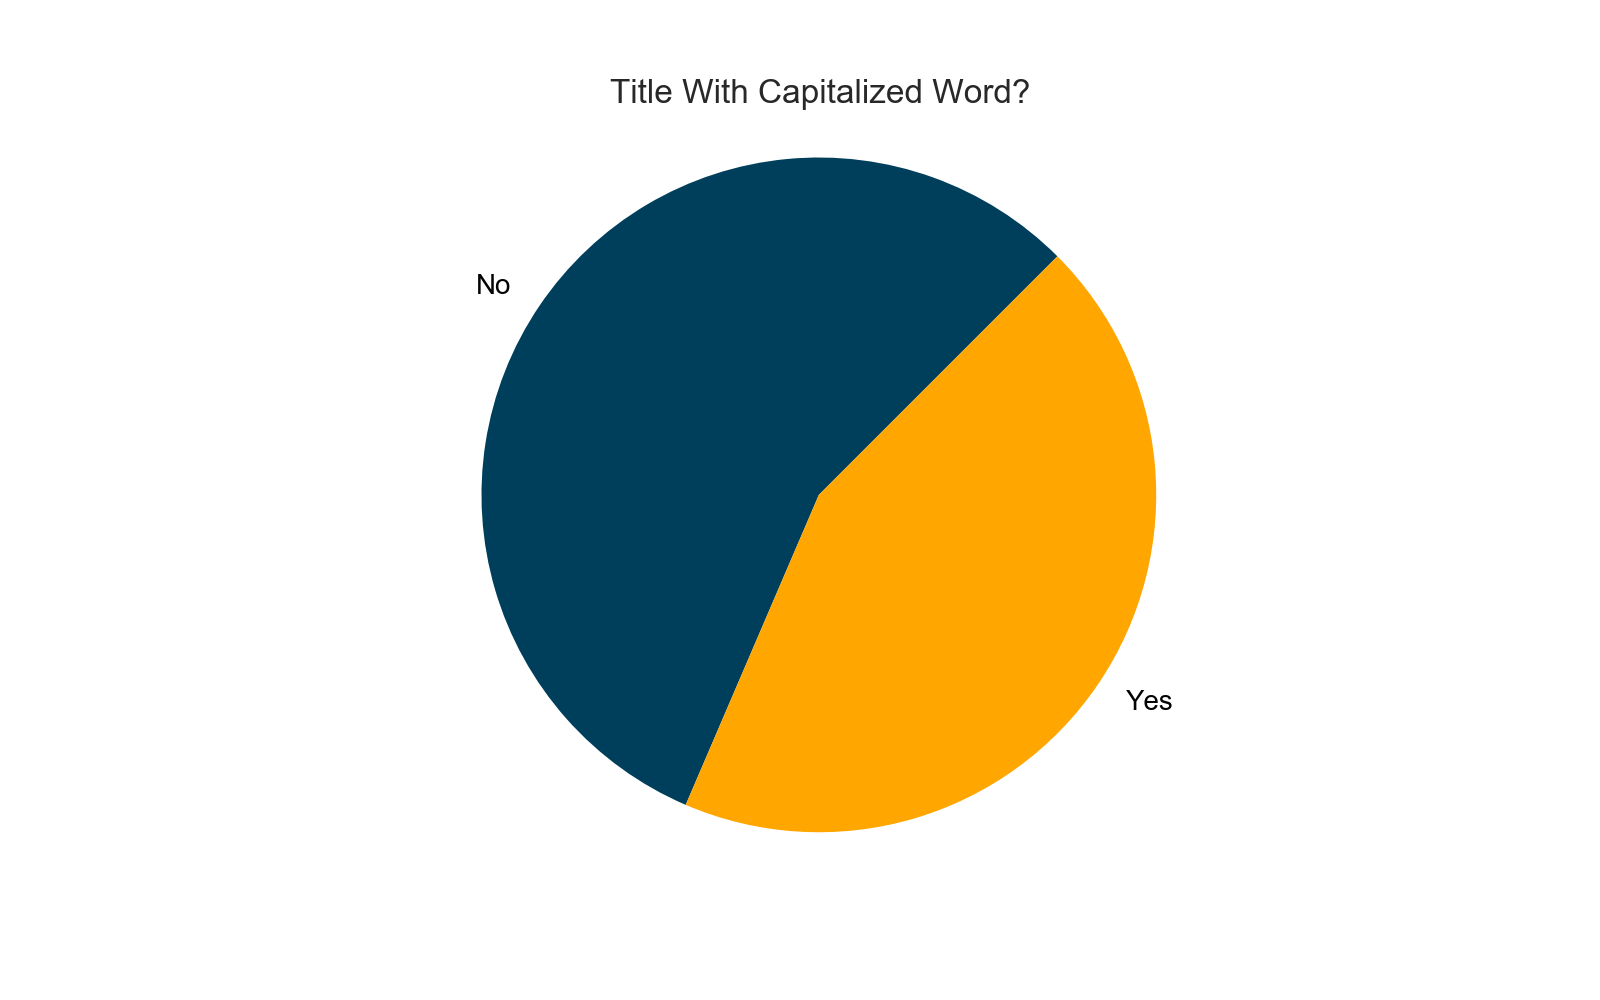

In [12]:
# Capital title graph

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title With Capitalized Word?')

In [22]:
df["contains_capitalized"].value_counts(normalize=True)

# Looks like about 44% of videos have a capital word (ex. HOW)
# Meaning capital words doesn't have a strong correlations to being a trending video

False    0.560429
True     0.439571
Name: contains_capitalized, dtype: float64

What about how long a video title? Does having a shorter or longer title equals more views?

<IPython.core.display.Javascript object>


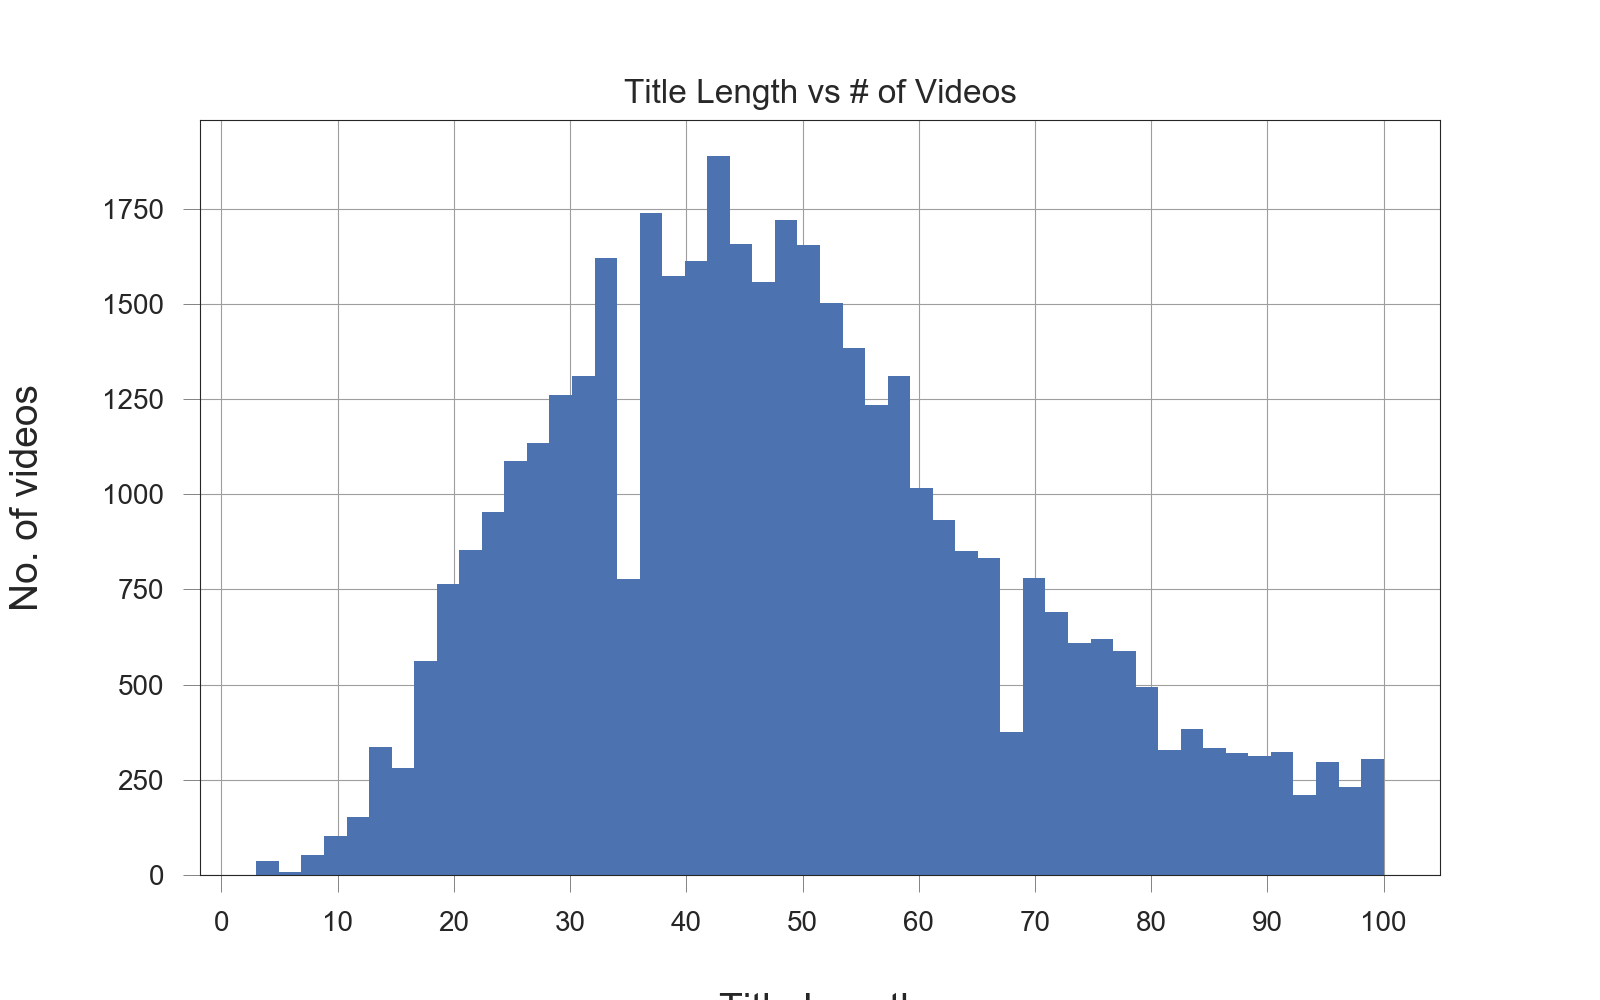

In [13]:
# Let's see if title length have any effect to views

df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))
_ = ax.set_title('Title Length vs # of Videos')

Our graph looks like a normal disribution. Guess title length have no effect to views

In [14]:
# Let's check our correlation function again with our data since we have new columns to analysis

df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,milView,contains_capitalized,title_length
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03,-0.17,0.06,0.02
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00,0.33,-0.03,-0.04
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00,0.33,-0.00,-0.08
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00,0.13,-0.02,-0.03
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00,0.23,0.02,-0.07
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00,-0.00,0.01,0.03
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00,-0.02,0.00,0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.02,-0.01
milView,-0.17,0.33,0.33,0.13,0.23,-0.00,-0.02,0.00,1.00,0.00,-0.06
contains_capitalized,0.06,-0.03,-0.00,-0.02,0.02,0.01,0.00,-0.02,0.00,1.00,0.13


<IPython.core.display.Javascript object>


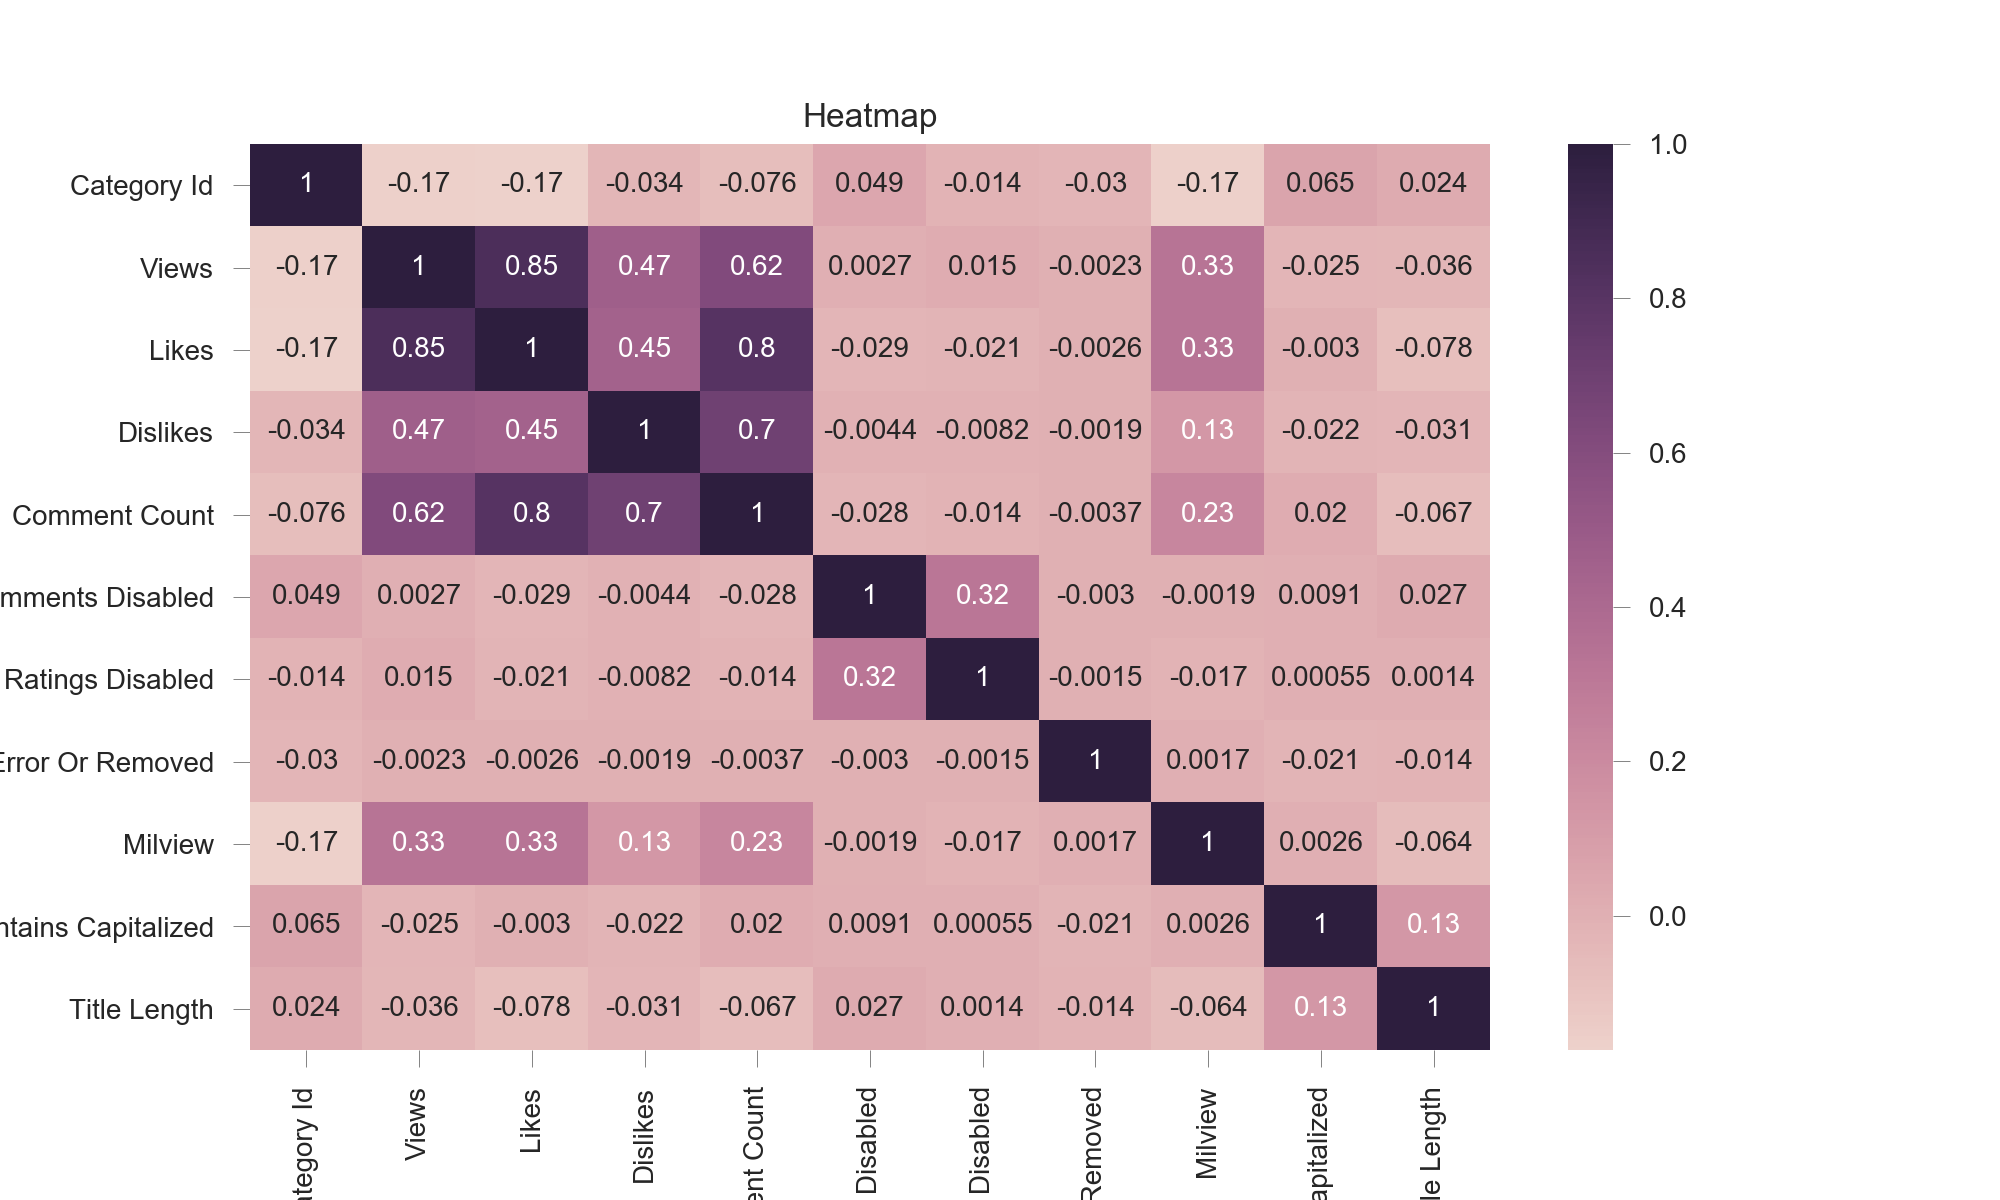

In [15]:
# A Heatmap for our correlation between our data

h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)
_ = plt.xticks(rotation=90)
_ = plt.yticks(rotation=0)
_ = ax.set_title('Heatmap')


The correlation map and correlation table above say that views and likes are highly positively correlated.

### Let's graph how many videos have 10, 20, 30 million views

<IPython.core.display.Javascript object>


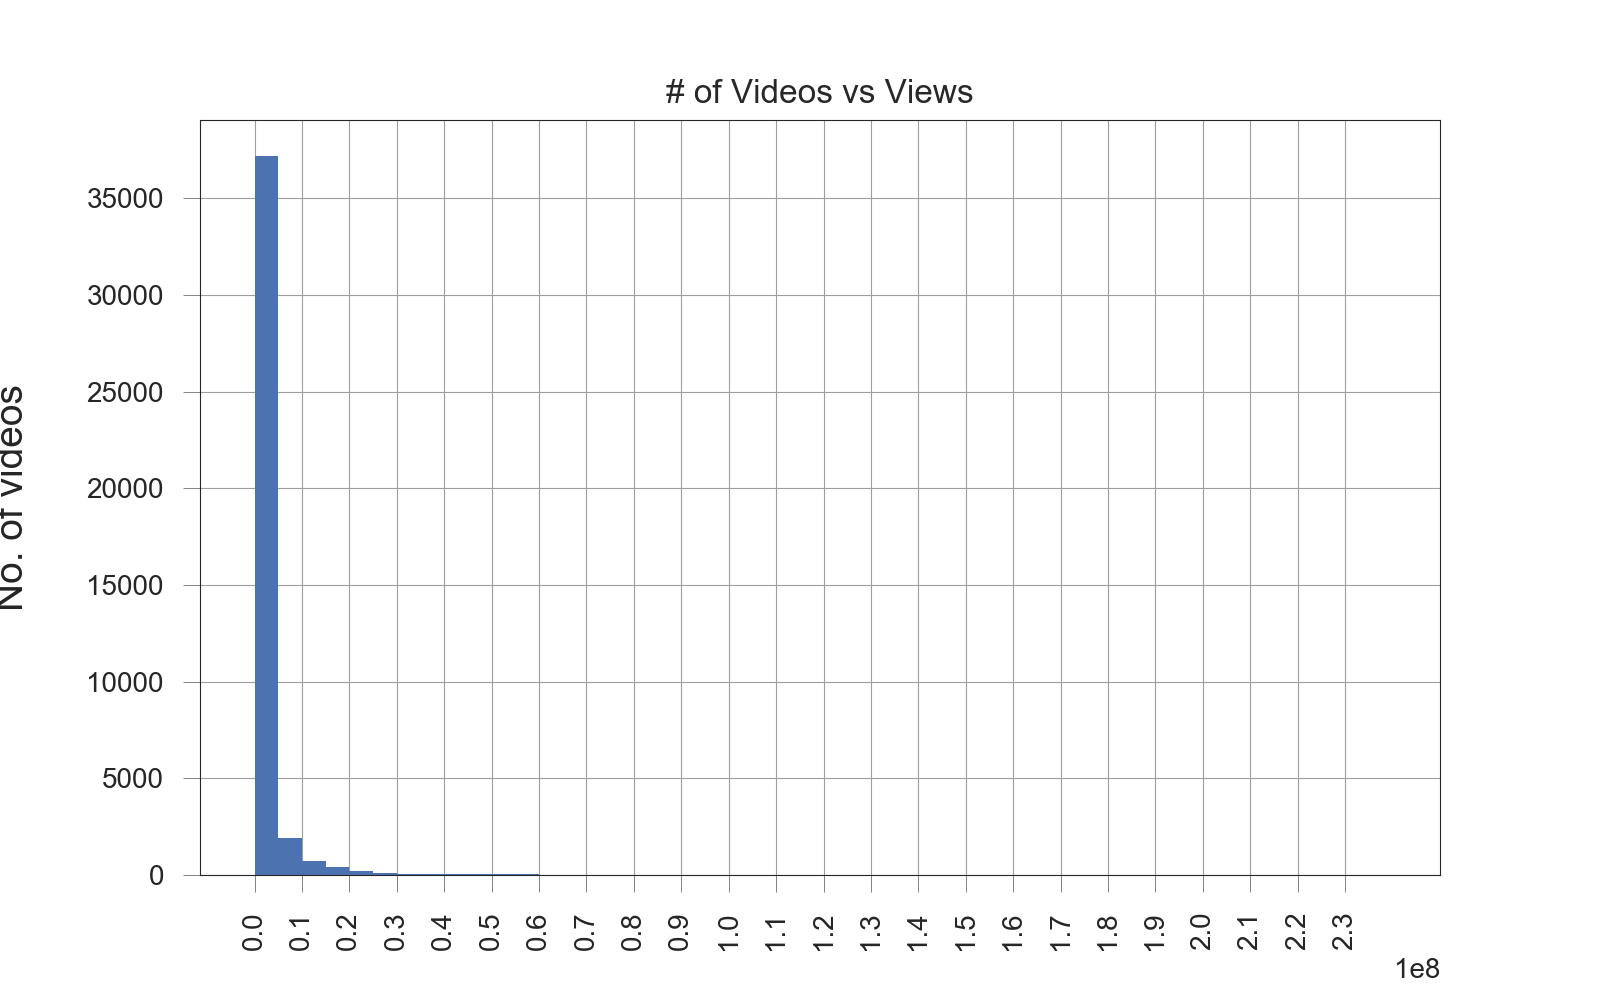

In [16]:
# This is a plot to see the distribution in the view columns
# This will show us how many videos have between 10 million and 20 million views, 
# how many videos have between 20 million and 30 million views, and so on.

fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)
_ = ax.set_title('# of Videos vs Views')

Looks like most of the videos in the dataset is between 5 million or less. Let's create another graph but this time we will focus more on the 5 million or less videos. 

<IPython.core.display.Javascript object>


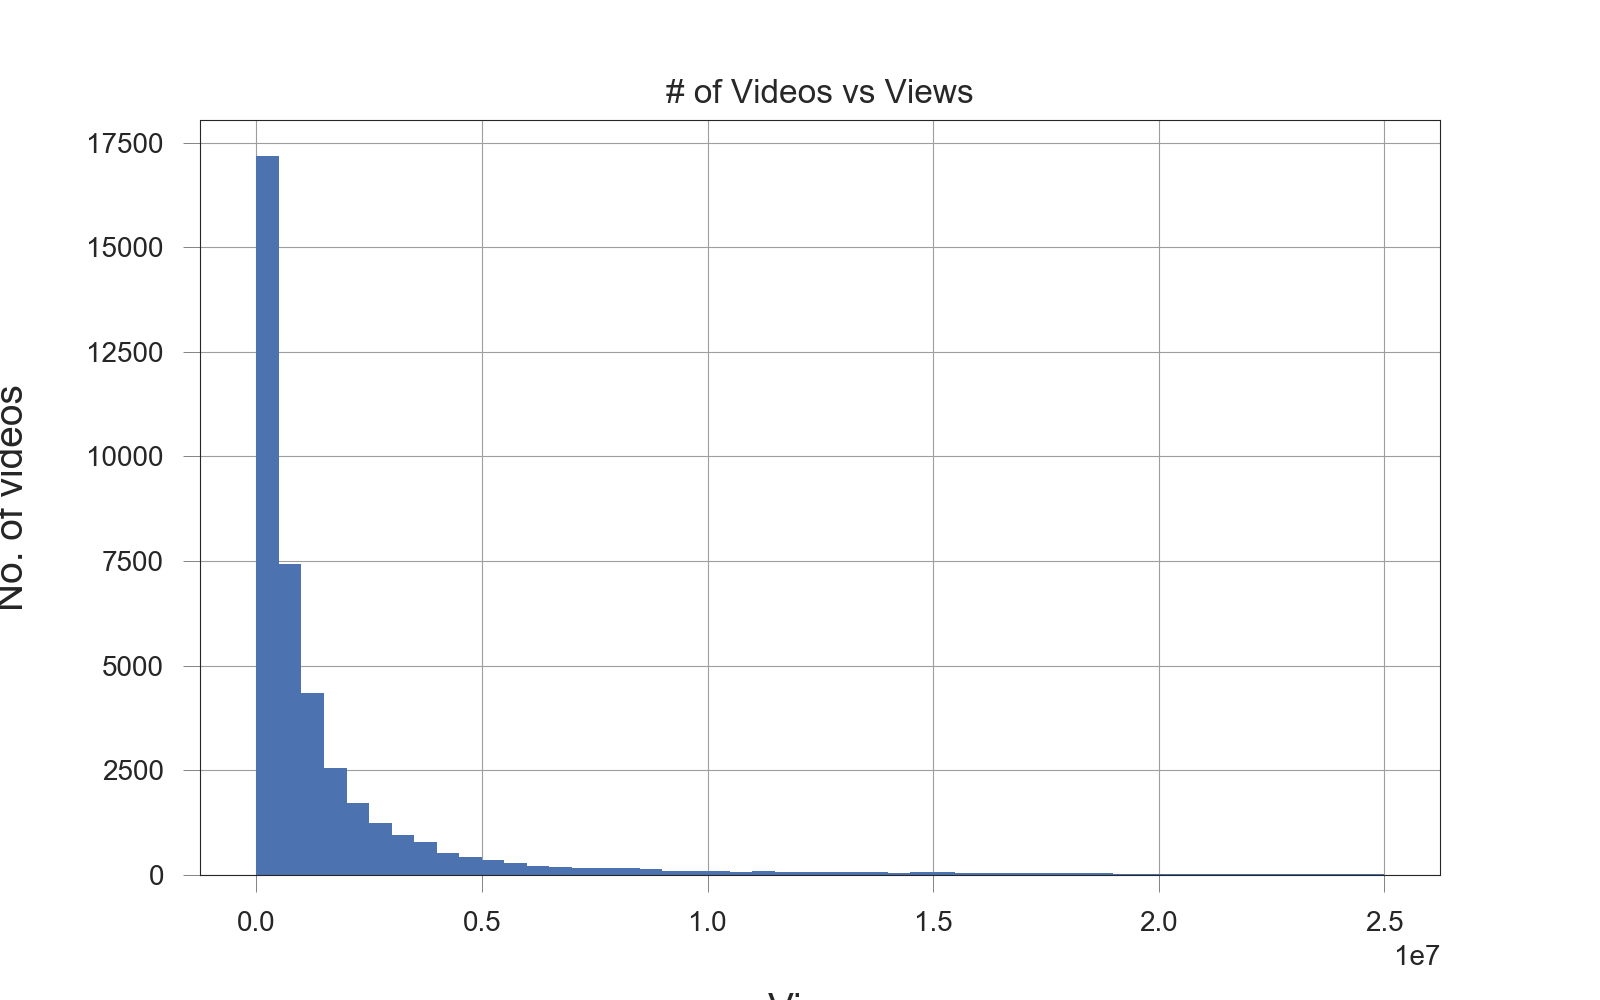

In [17]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")
_ = ax.set_title('# of Videos vs Views')

Looks like the majority of trending videos have 1 million views or less. Let's see the exact percentage of videos less than 1 million views

### Common words in a Video title

In [18]:
# Getting 25 most common words in a title 
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

Let's ignore "the" and "of", we can see that "-" and "|" symbols occured a lot in trending video titles. We notice also that words "Video", "Trailer", "How", and "2018" are common in trending video titles. Let's use a wordcloud to have a better idea which word is used the most

<IPython.core.display.Javascript object>


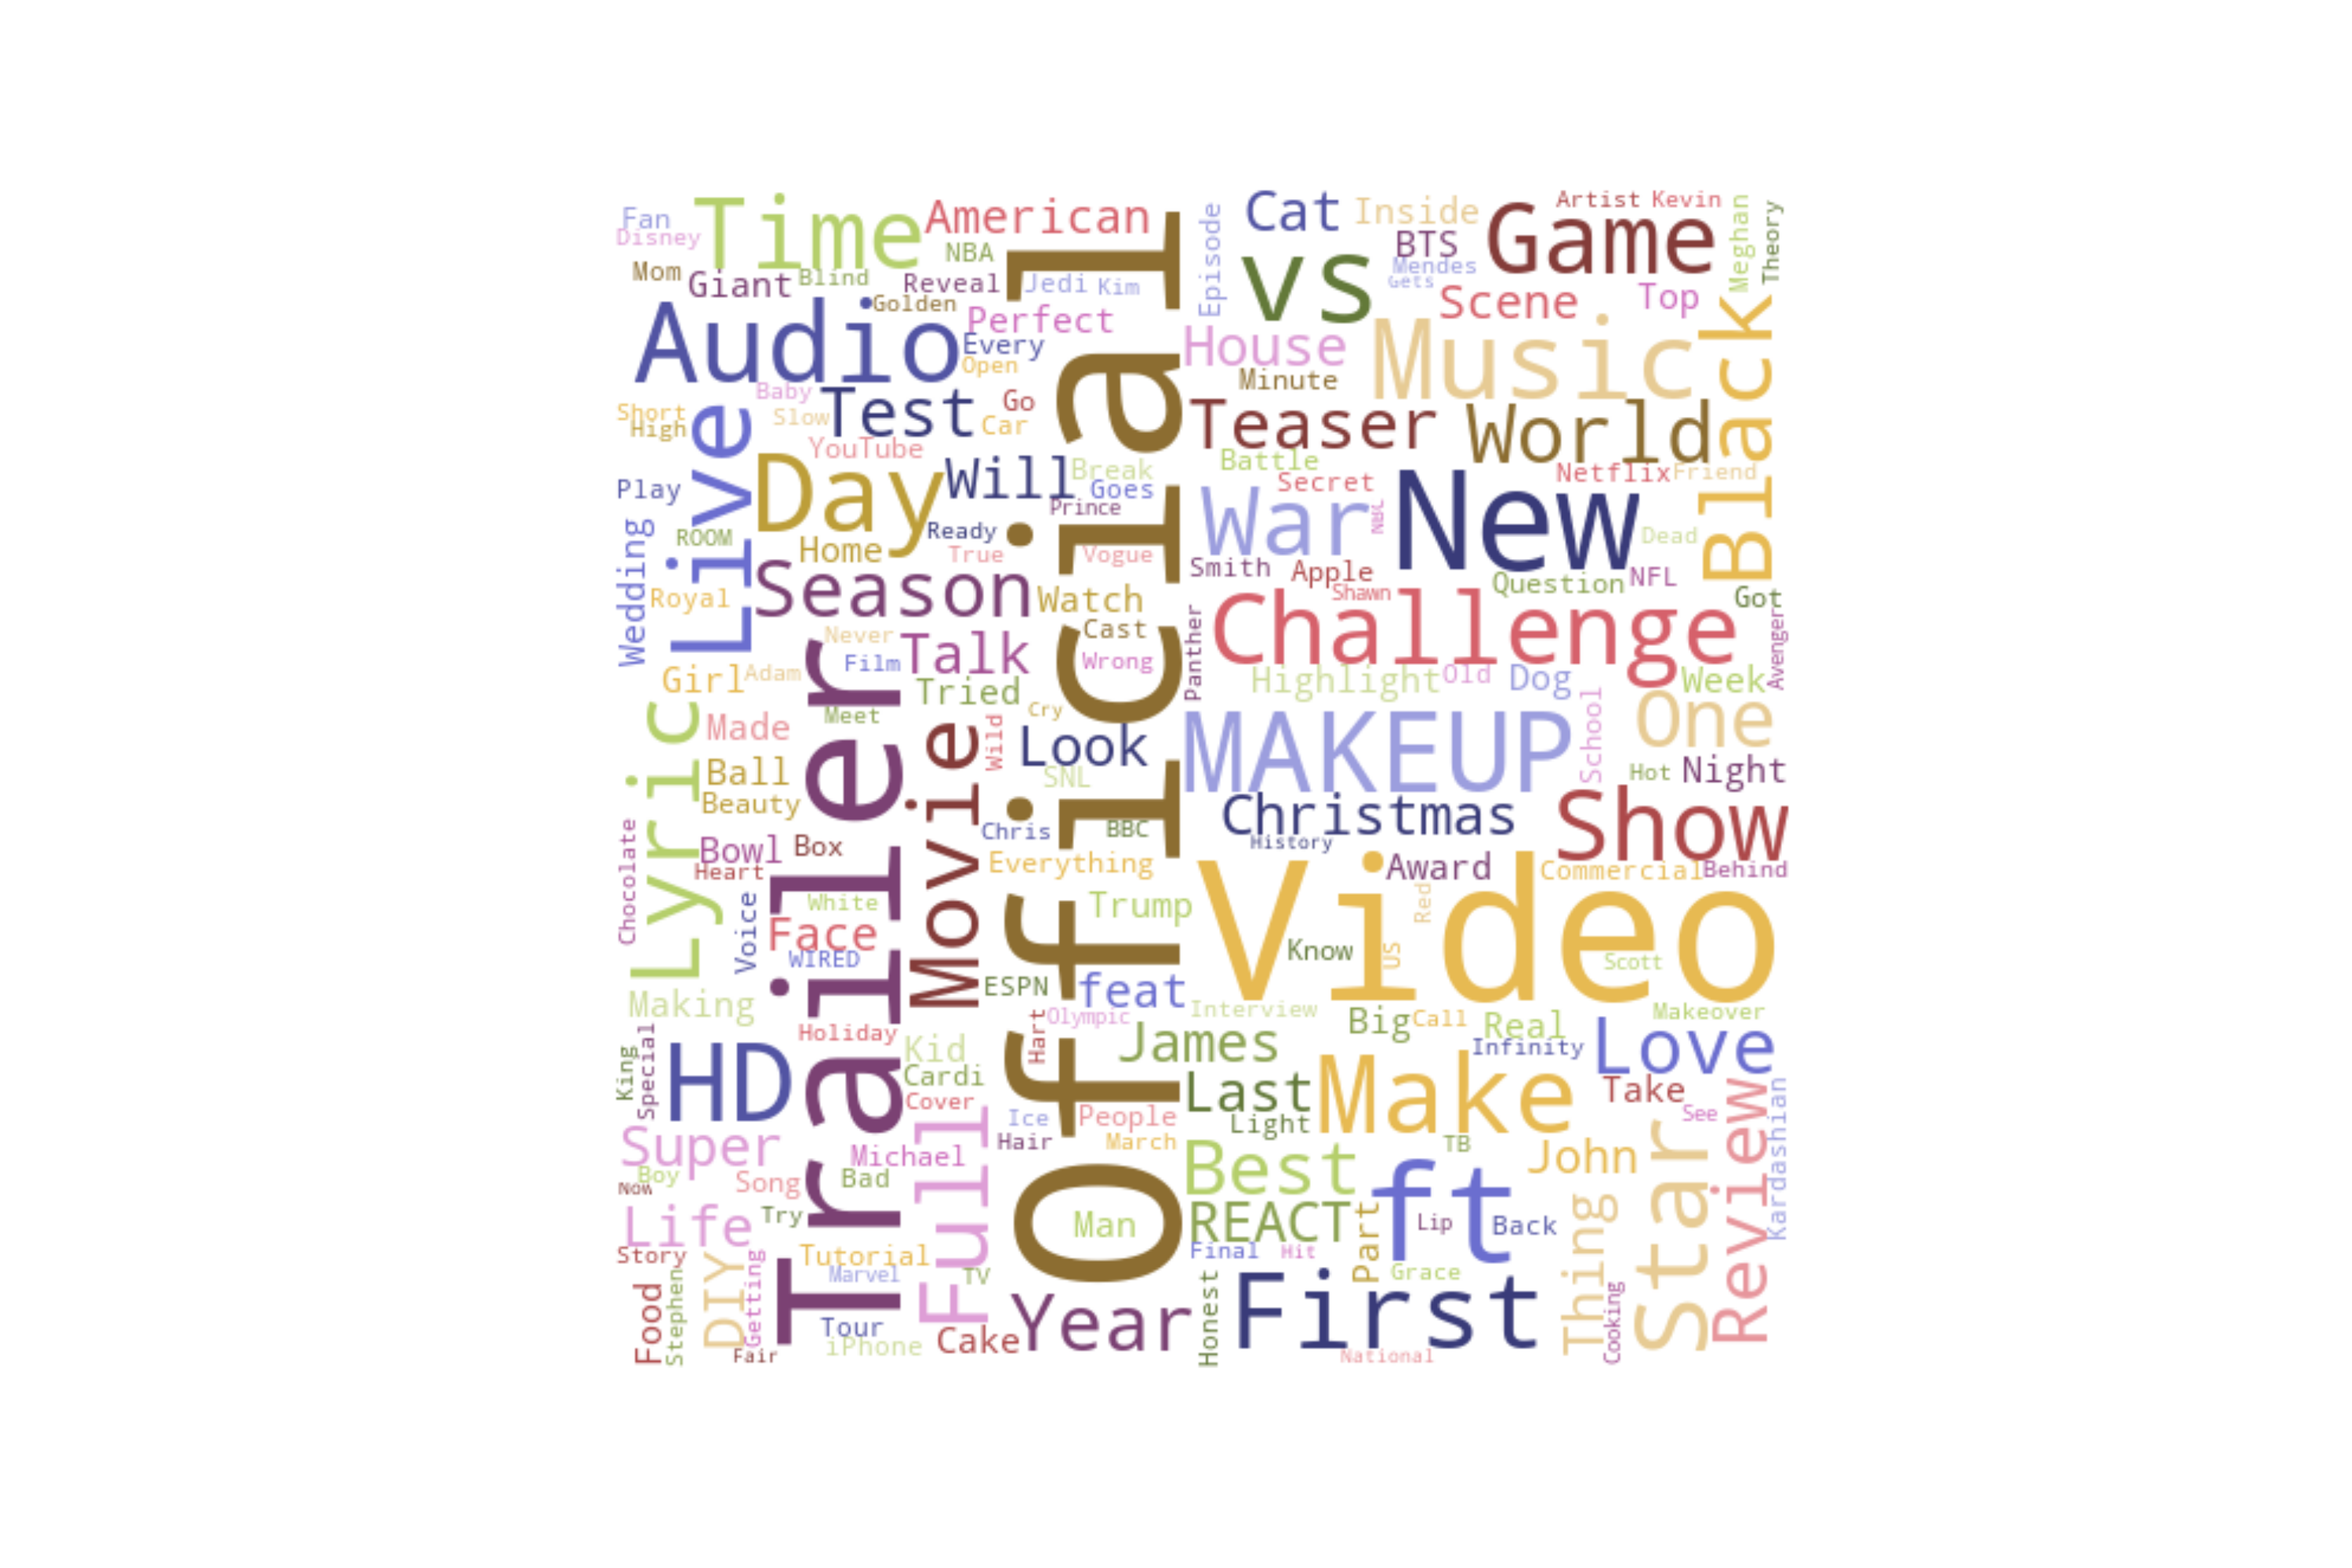

In [19]:
# wc = wordcloud.WordCloud(width=500, height=500, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=500, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

### Let's check out which category has the most trending video

<IPython.core.display.Javascript object>


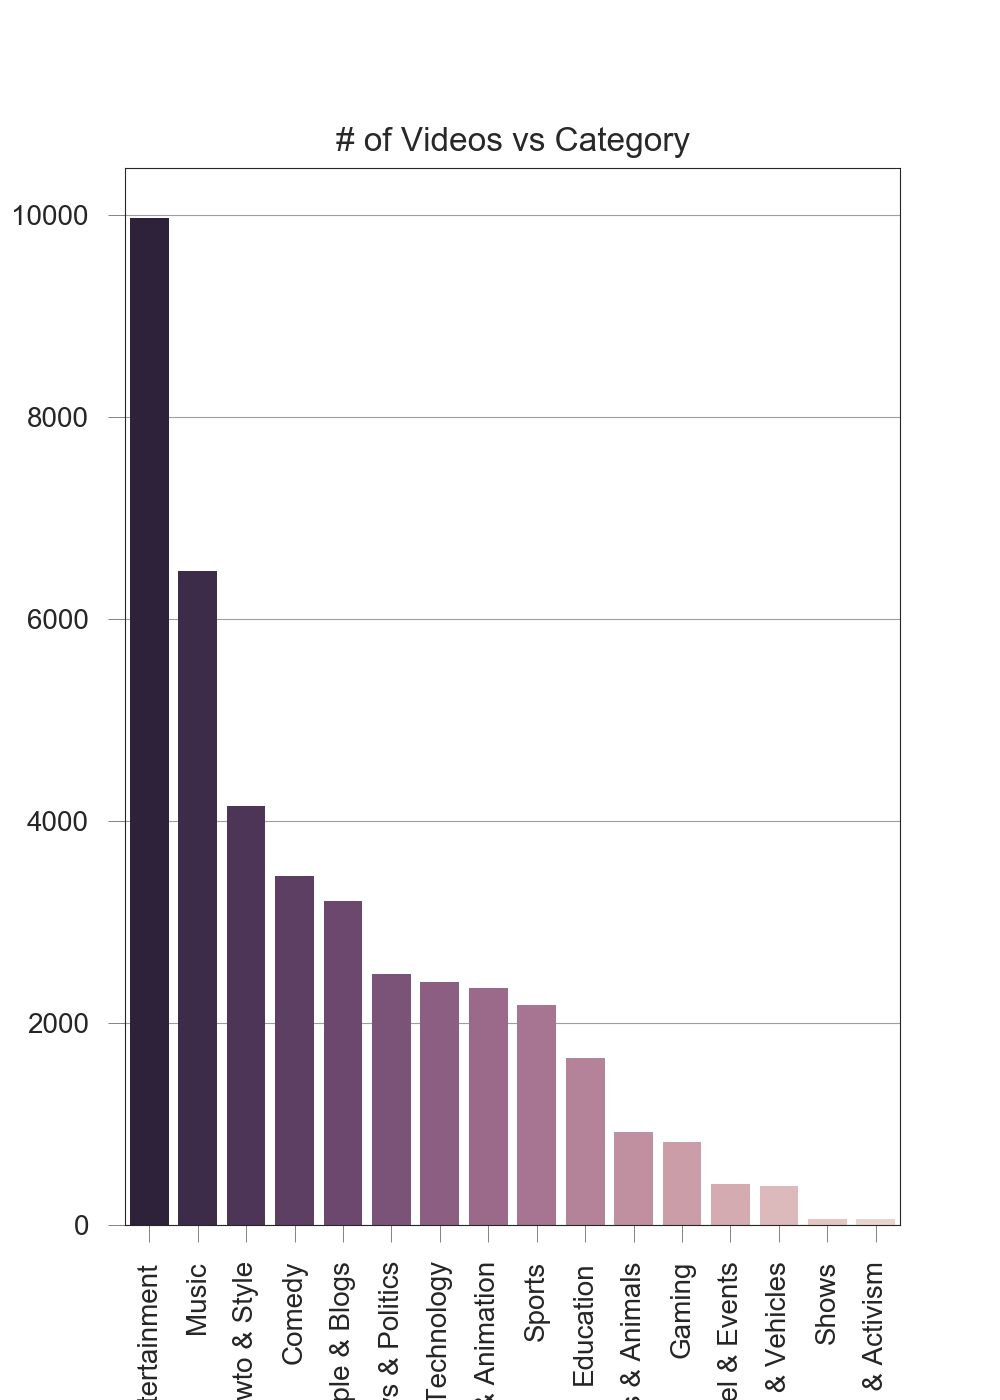

In [20]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots(figsize=(5, 7))
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")
_ = ax.set_title('# of Videos vs Category')

The Entertainment category contains the largest number of trending videos followed by Music category then followed by Howto & Style category and so on.

## Publishing time

<IPython.core.display.Javascript object>


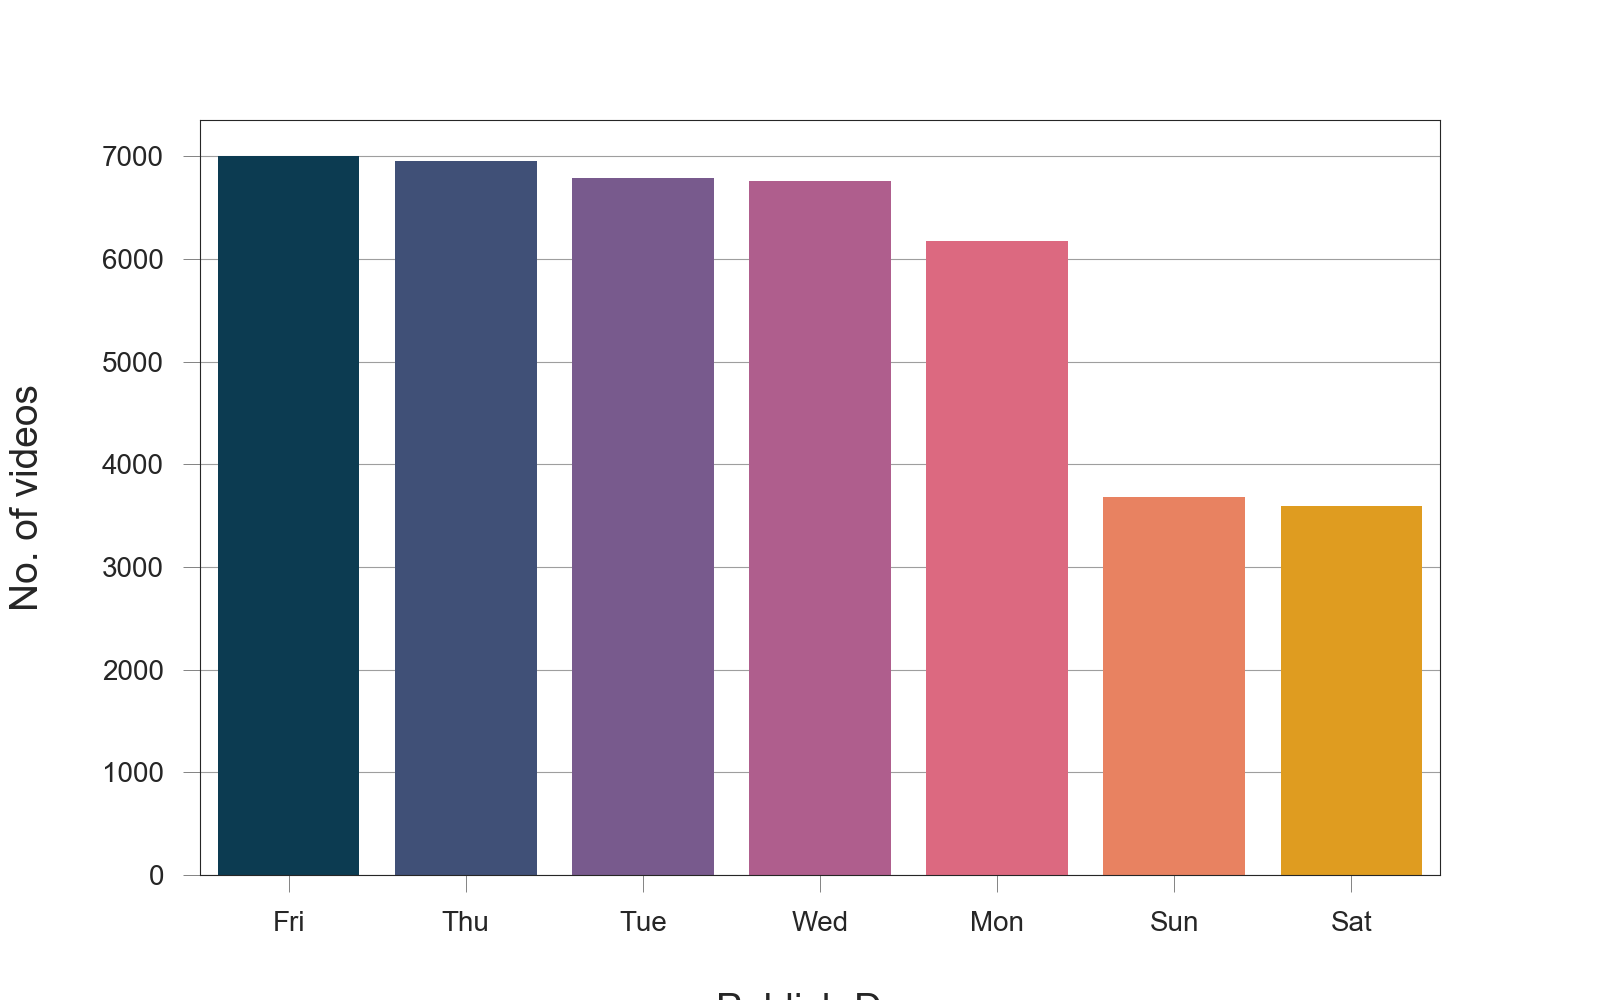

In [21]:
# Adding two new columns to represent the date and hour of publishing each video,
# then removing publish_time column.
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)


# Creating a graph of videos vs publish time

cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publish Day", ylabel="No. of videos")


## Exporting our modify dataset to a excel .csv

In [22]:
df.to_csv("YouTubeUS.csv", sep = ',')

In [23]:
df.to_excel('Youtubeus.xlsx', sheet_name= 'Sheet1')

C:\Users\Luffy\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:830: UserWarning: Ignoring URL 'http://instagram.com/alexgilbert\nhttp://facebook.com/nzalexgilbert\nhttp://twitter.com/alexgilbertnz\n\nBefore%20I%20found%20my%20Birth%20Father%20in%202013,%20%20he%20didn't%20know%20I%20existed.%20When%20I%20first%20contacted%20him%20I%20don't%20think%20ever%20expected%20to%20have%20a%20son%20in%20New%20Zealand.%20He%20thanked%20my%20Mum%20and%20Dad%20and%20still%20does%20to%20this%20day.%20I%20always%20thank%20my%20Birth%20Father%20for%20letting%20me%20into%20his%20life.\n\nNote:%20I%20own%20all%20copyright%20for%20my%20videos.%20Please%20contact%20the%20team%20at%20contact@imadopted.org%20for%20any%20license%20details.%20This%20link%20can%20be%20shared%20or%20from%20Facebook%20at%20https://www.facebook.com/nzalexgilbert/videos/1493241727420733/%20as%20long%20as%20I%20am%20credited%20from%20YouTube%20or%20Tagged%20with%20my%20Facebook%20Page.' with link or loca

C:\Users\Luffy\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:830: UserWarning: Ignoring URL 'http://people.ece.cornell.edu/land/courses/ece4760/FinalProjects/f2017/mh866_jtm293_kan54/mh866_jtm293_kan54/mh866_jtm293_kan54/index.html\nWe%20created%20a%20steak-cooking%20robot.%20All%20you%20do%20is%20put%20the%20steak%20on%20the%20robot’s%20food-safe%20skewers%20and%20food%20probe%20and%20it%20does%20the%20rest.%20We%20decided%20to%20create%20this%20robot%20to%20cook%20better%20steaks%20using%20precise%20temperature%20measurements%20throughout%20the%20entire%20cooking%20process%20and,%20most%20importantly,%20not%20have%20to%20babysit%20the%20grill%20to%20achieve%20this.' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Users\Luffy\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:830: UserWarning: Ignoring URL 'https://www.hoonigan.com/%20On%20today's%20episode%20of%20Dail

C:\Users\Luffy\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:830: UserWarning: Ignoring URL 'http://readyplayeronemovie.com\nhttp://facebook.com/readyplayerone\nhttp://twitter.com/readyplayerone\nhttp://instagram.com/readyplayerone\n\n--%20\n\nFrom%20filmmaker%20Steven%20Spielberg%20comes%20the%20action%20adventure%20“Ready%20Player%20One,”%20based%20on%20Ernest%20Cline’s%20bestseller%20of%20the%20same%20name,%20which%20has%20become%20a%20worldwide%20phenomenon.%20%20\n\nThe%20film%20is%20set%20in%202045,%20with%20the%20world%20on%20the%20brink%20of%20chaos%20and%20collapse.%20%20But%20the%20people%20have%20found%20salvation%20in%20the%20OASIS,%20an%20expansive%20virtual%20reality%20universe%20created%20by%20the%20brilliant%20and%20eccentric%20James%20Halliday%20(Mark%20Rylance).%20%20When%20Halliday%20dies,%20he%20leaves%20his%20immense%20fortune%20to%20the%20first%20person%20to%20find%20a%20digital%20Easter%20egg%20he%20has%20hidden%20somewhere%20in%20th

C:\Users\Luffy\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:830: UserWarning: Ignoring URL 'http://www.justgiving.com/SDMN-----------------------------------------------------------------------------------------------------------------------Sidemen:●%20Miniminter:%20http://www.youtube.com/Miniminter●%20Zerkaa:%20http://www.youtube.com/Zerkaa●%20Behzinga:%20http://www.youtube.com/Behzinga●%20Vikkstar123:%20http://www.youtube.com/Vikkstar123●%20TBJZL:%20http://www.youtube.com/TBJZL●%20Wroetoshaw:%20http://www.youtube.com/Wroetoshaw●%20KSI:%20http://www.youtube.com/KSI' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
